In [2]:
###### load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.preprocessing import binarize
import pickle
import seaborn as sns
from matplotlib.colors import LogNorm, Normalize
from mapseq_fxns import sort_by_celltype
# from math import log10
from scipy import stats

# random sample consimment between runs
import random

# import multiple t-tests
from statsmodels.sandbox.stats.multicomp import multipletests



%matplotlib inline

In [3]:
# set-up variables
in_path = '/Volumes/Data/Emily/MAPseq/combined_analysis_M194_M220/'
out_path = '/Volumes/Data/Emily/MAPseq/combined_analysis_M194_M220/output/'

# import metadata
from M194_M220_metadata import *

# import colormaps
from colormaps import purple_cmp, green_cmp, blue_cmp, orange_cmp

metadata

,mice,species,sex,dataset
0,MMM1,Mmus,male,M194
1,MMF2,Mmus,female,M194
2,MMF3,Mmus,female,M194
3,STM1,Steg,male,M194
4,STM2,Steg,male,M194
5,STF3,Steg,female,M194
6,MMM4,Mmus,male,M220
7,MMF5,Mmus,female,M220
8,STF4,Steg,female,M220
9,STM5,Steg,male,M220


In [4]:
#### load data
with open(in_path +'M194_M220_OMC_bin4.pkl', 'rb') as f:
    omc_bin = pickle.load(f)   

In [5]:
# seperate by cell type

omc_type = [sort_by_celltype(omc_bin[i]) for i in range(num_samples)]
omc_pt = [(omc_type[i][omc_type[i]['type']==1000]).drop(["type"], axis=1).reset_index(drop=True) for i in range(num_samples)]
omc_it = [(omc_type[i][omc_type[i]['type']==10]).drop(["type"], axis=1).reset_index(drop=True) for i in range(num_samples)]

omc_mm = []
omc_st = []
omc_pt_mm = []
omc_pt_st = []
omc_it_mm = []
omc_it_st = []
mice_mm=[]
mice_st=[]

for i in range(num_samples):
    if metadata.species[i] == 'Mmus':
        omc_mm.append(omc_type[i])
        omc_pt_mm.append(omc_pt[i])
        omc_it_mm.append(omc_it[i])
        mice_mm.append(mice[i])
    else:
        omc_st.append(omc_type[i])
        omc_pt_st.append(omc_pt[i])
        omc_it_st.append(omc_it[i])
        mice_st.append(mice[i])

omc_mm_all = pd.concat(omc_mm)
omc_st_all = pd.concat(omc_st)

In [6]:
def clean_up_data(df_dirty):
    # drop unused areas
    to_drop = ['OB', 'ACAi', 'ACAc', 'HIP']
    dropped = df_dirty.drop(to_drop, axis=1)

    # change RN to bs
    replaced = dropped.rename(columns={'RN':'BS'})

    return replaced


In [7]:
# clean-up datasets
# drop OB, ACAc, HIP
to_drop = ['OB', 'ACAi', 'ACAc', 'HIP']
omc_st_all = omc_st_all.drop(to_drop, axis=1)
omc_st_all = omc_st_all.drop(to_drop, axis=1)

# change RN to BS
omc_st_all = omc_st_all.rename(columns={'RN':'BS'})
omc_st_all = omc_st_all.rename(columns={'RN':'BS'})


# change type so .25,.5,.75
st_type_col = omc_st_all['type']
st_replace = np.where(st_type_col==1000, 0.75, st_type_col)
st_replace = np.where(st_replace==100, 0.5, st_replace)
st_replace = np.where(st_replace==10, 0.25, st_replace)
omc_st_all['type'] = st_replace

# change type so .25,.5,.75
st_type_col = omc_st_all['type']
st_replace = np.where(st_type_col==1000, 0.75, st_type_col)
st_replace = np.where(st_replace==100, 0.5, st_replace)
st_replace = np.where(st_replace==10, 0.25, st_replace)
omc_st_all['type'] = st_replace

print(omc_st_all.shape)
print(omc_st_all.shape)
omc_st_all.columns

KeyError: "['OB', 'ACAi', 'ACAc', 'HIP'] not found in axis"

In [ ]:
for i in range(len(omc_it_mm)):
    omc_it_mm[i] = clean_up_data(omc_it_mm[i])

for i in range(len(omc_pt_mm)):
    omc_pt_mm[i] = clean_up_data(omc_pt_mm[i])

In [8]:
for i in range(len(omc_it_st)):
    omc_it_st[i] = clean_up_data(omc_it_st[i])

for i in range(len(omc_pt_st)):
    omc_pt_st[i] = clean_up_data(omc_pt_st[i])

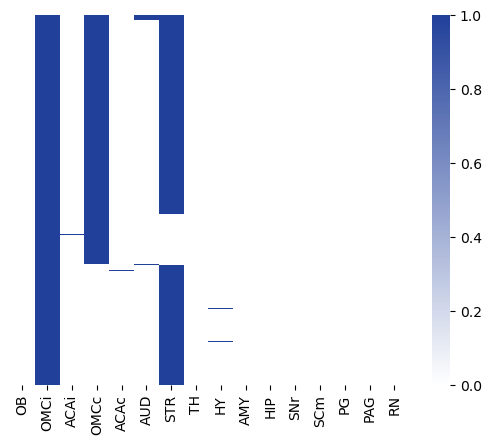

In [9]:
# drop columns that excluded in IT population
omc_it_mm[0]
sns.heatmap(omc_it_mm[0], cmap=blue_cmp)
plt.gca().get_yaxis().set_visible(False)
# create branching graph?

Text(0.5, 0.98, 'OMC it cells')

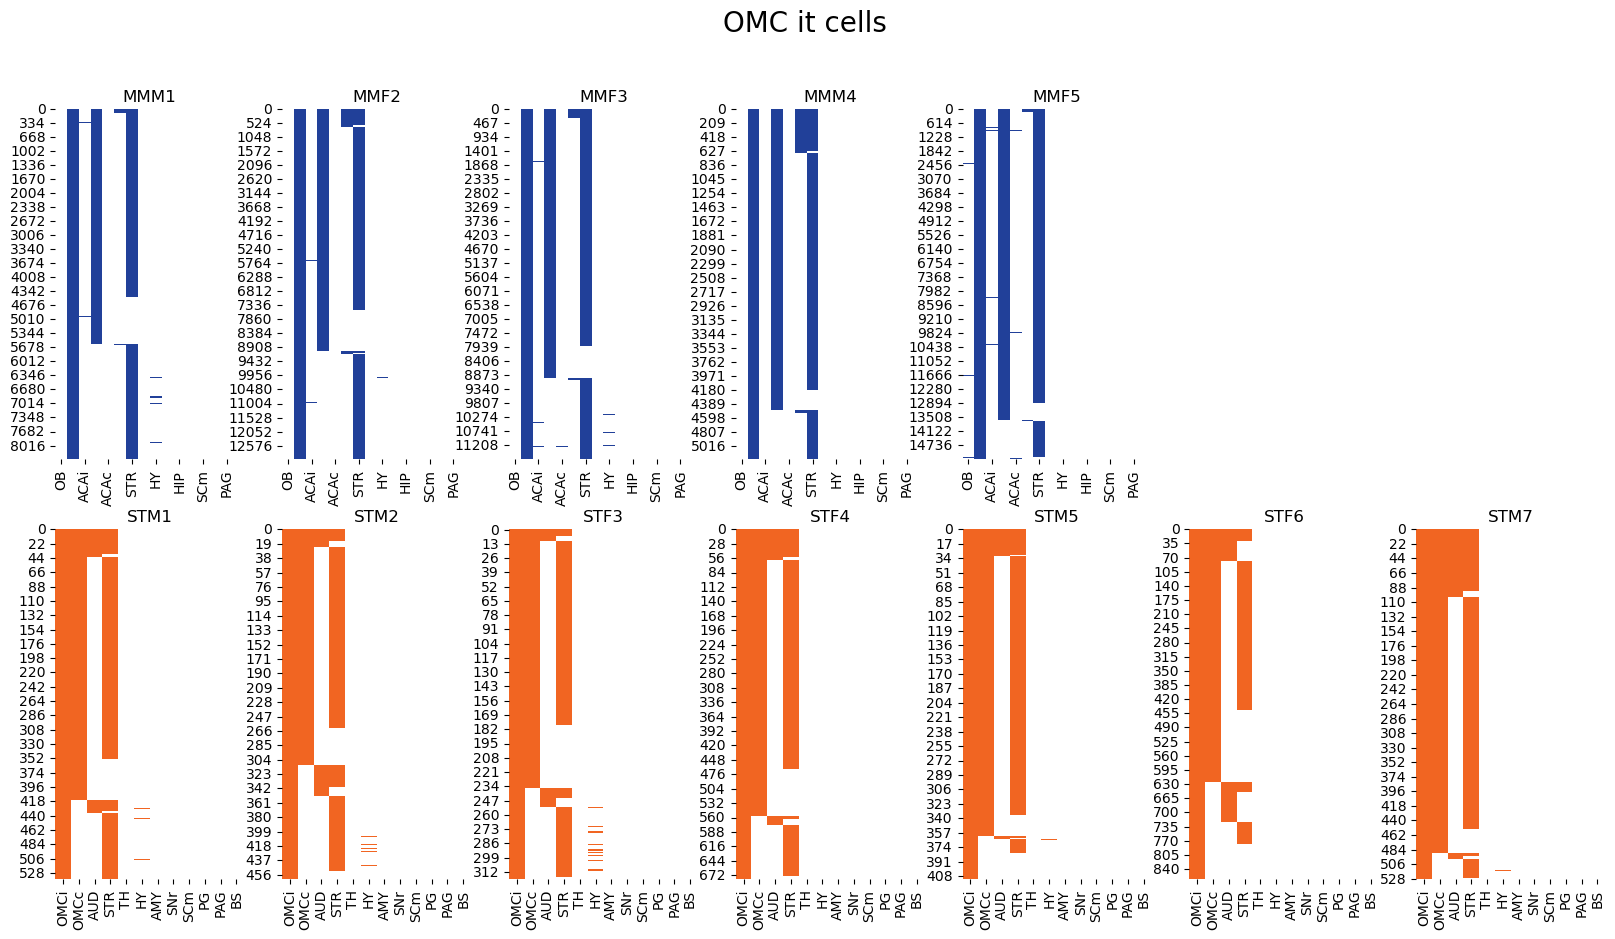

In [10]:
fig, axs = plt.subplots(2,7, figsize=(20,10))

i=0
for ax in axs.flat[:7]:
    if i >= 5:
        ax.axis('off')
    else:

        plot = omc_it_mm[i]
        # sort by cell type
        # plot = plot.sort_values(by=['type']).reset_index(drop=True)
        
        sns.heatmap(plot, cmap=blue_cmp, cbar=False, ax=ax)
        # ax.get_yaxis().set_visible(False)
        ax.set_title(mice_mm[i])
        
    i+=1
    
i=0
for ax in axs.flat[7:]:

    plot = omc_it_st[i]
    # sort by cell type
    # plot = plot.sort_values(by=['type']).reset_index(drop=True)
    
    sns.heatmap(plot, cmap=orange_cmp, cbar=False, ax=ax)
    # ax.get_yaxis().set_visible(False)
    ax.set_title(mice_st[i])

    i+=1

plt.suptitle("OMC it cells", size=20)

Text(0.5, 0.98, 'OMC pt cells')

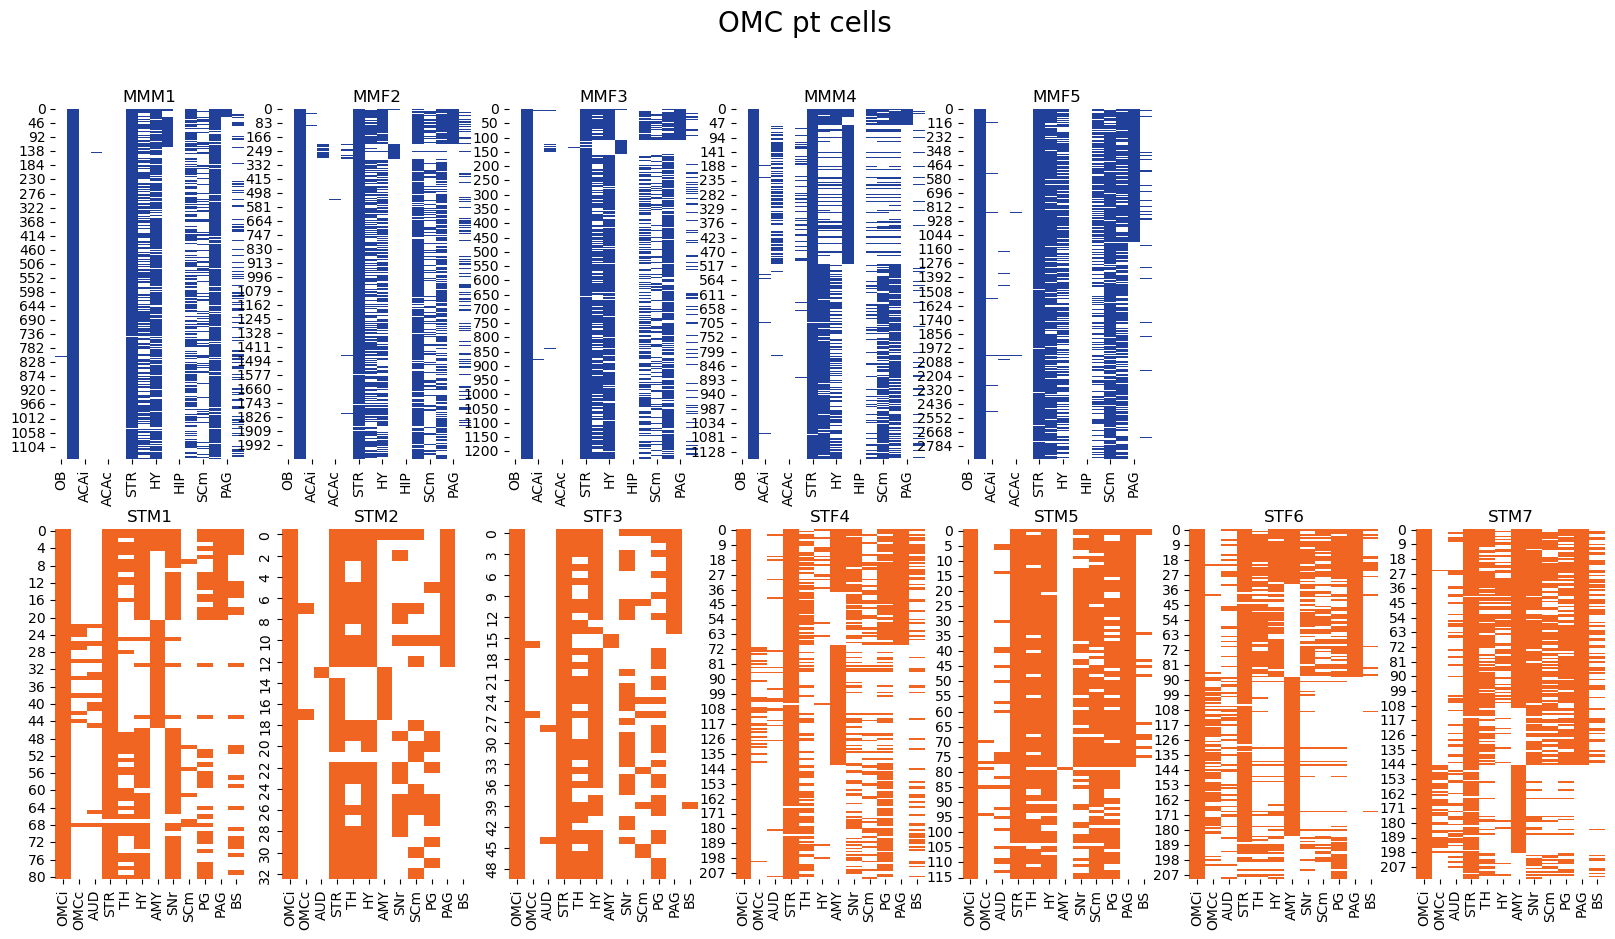

In [11]:
fig, axs = plt.subplots(2,7, figsize=(20,10))

i=0
for ax in axs.flat[:7]:
    if i >= 5:
        ax.axis('off')
    else:
        plot = omc_pt_mm[i]
        # sort by cell type
        # plot = plot.sort_values(by=['type']).reset_index(drop=True)
        
        sns.heatmap(plot, cmap=blue_cmp, cbar=False, ax=ax)
        # ax.get_yaxis().set_visible(False)
        ax.set_title(mice_mm[i])
    
    i+=1
    
i=0
for ax in axs.flat[7:]:

    plot = omc_pt_st[i]
    # sort by cell type
    # plot = plot.sort_values(by=['type']).reset_index(drop=True)
    
    sns.heatmap(plot, cmap=orange_cmp, cbar=False, ax=ax)
    # ax.get_yaxis().set_visible(False)
    ax.set_title(mice_st[i])

    i+=1

plt.suptitle("OMC pt cells", size=20)

## implement hierarchical clustering
see: https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering


In [12]:
# Agglomerative clustering 
# (bottom up, each point = cluster, then join)
from sklearn.cluster import AgglomerativeClustering
import time as time

X = omc_pt_st[6]

print("Compute unstructured hierarchical clustering...")
st = time.time()
ward = AgglomerativeClustering(n_clusters=3, linkage="ward").fit(X)
elapsed_time = time.time() - st
label = ward.labels_
print(f"Elapsed time: {elapsed_time:.2f}s")
print(f"Number of points: {label.size}")


Compute unstructured hierarchical clustering...
Elapsed time: 0.01s
Number of points: 215


<AxesSubplot: >

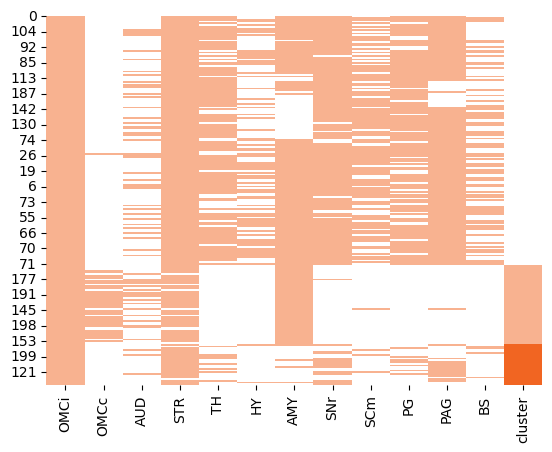

In [13]:
plot = X.copy()
plot['cluster'] = ward.labels_
plot = plot.sort_values(by='cluster')
sns.heatmap(plot, cmap=orange_cmp, cbar=False)

In [14]:
from sklearn.metrics import silhouette_score

silhouette_score(X, ward.labels_)

0.26762191903510746

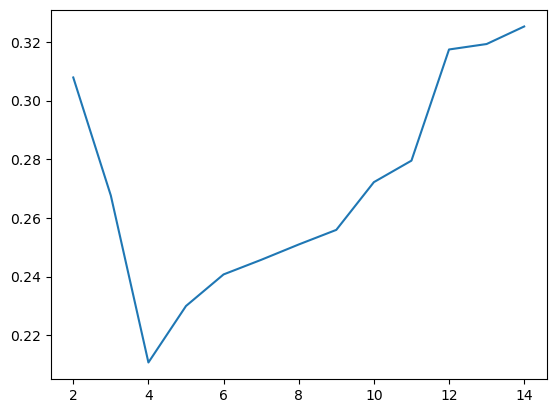

In [15]:
# calculate elbow for # of clusters
n_clusters = list(range(2,15))
scores = []

for i in n_clusters:
    # generate labels
    ward = AgglomerativeClustering(n_clusters=i, linkage="ward").fit(X)
    iscore = silhouette_score(X, ward.labels_)
    scores.append(iscore)

plot_df = pd.DataFrame({'n_clusters':n_clusters, 'silhouette_score':scores})

plt.plot(plot_df['n_clusters'], plot_df['silhouette_score'])


Text(0.5, 0.98, 'OMC pt cells')

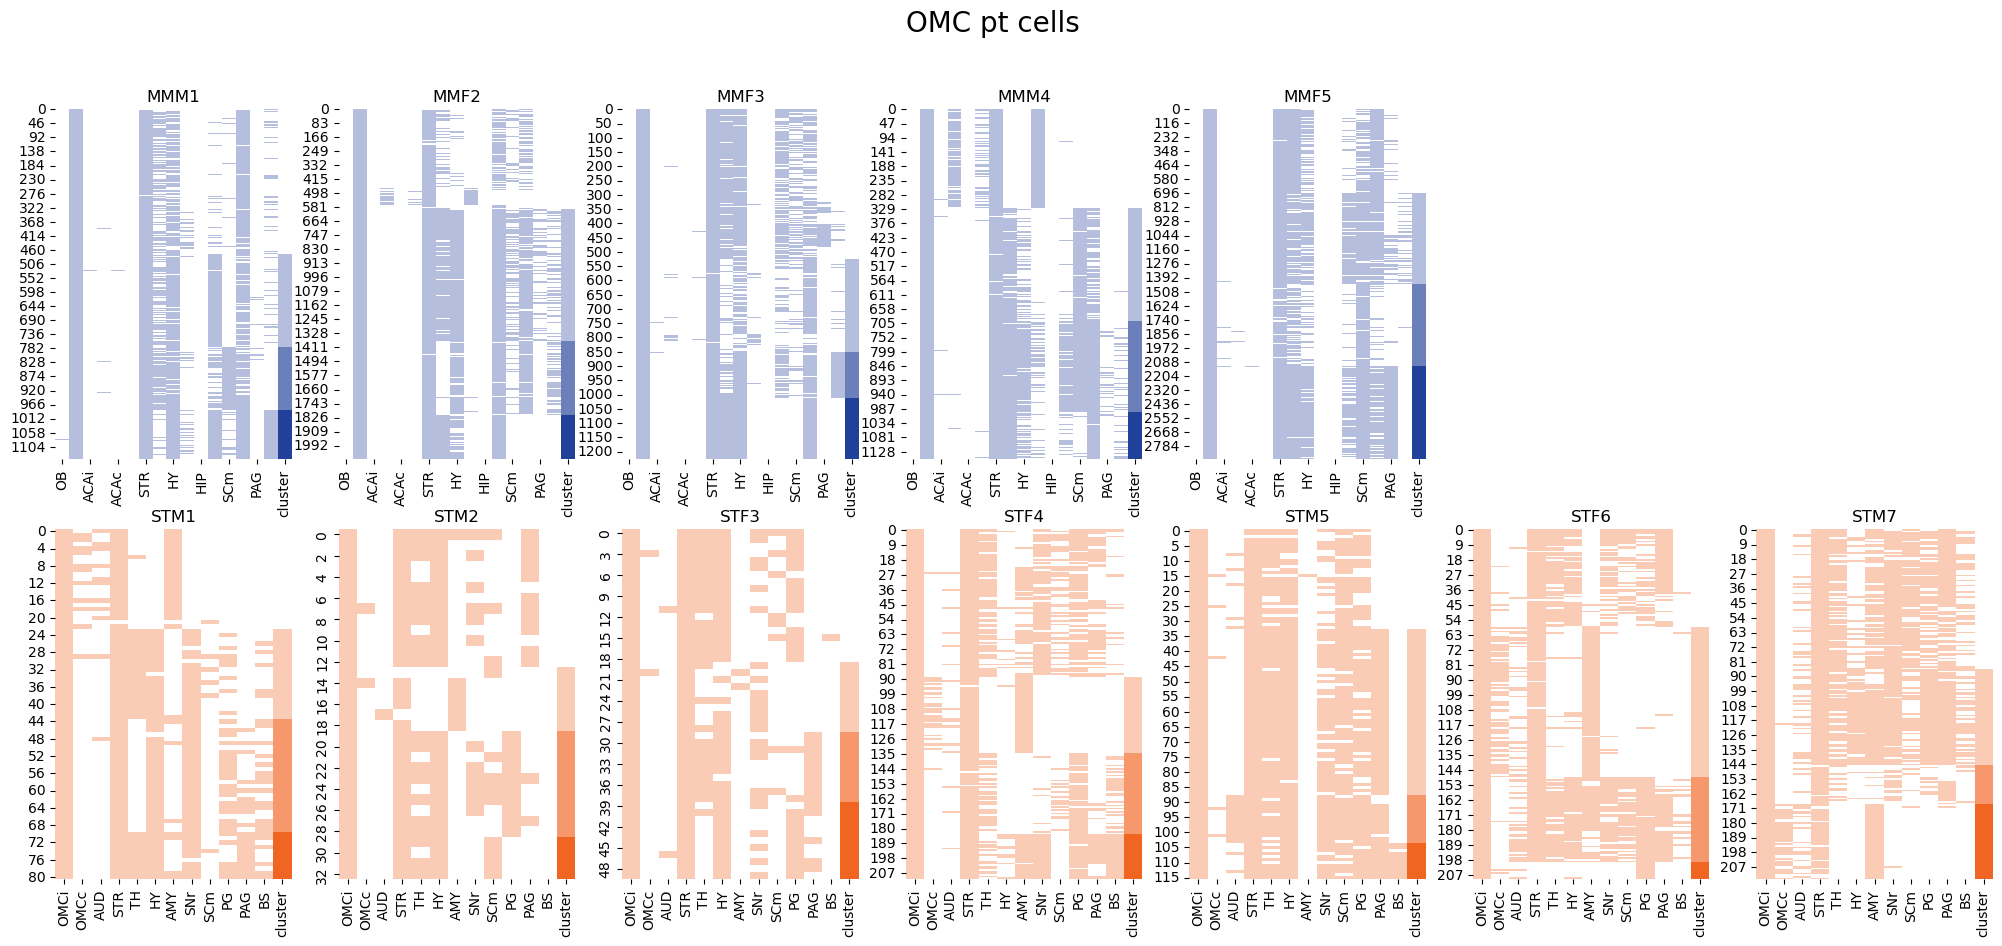

In [16]:
# use 4 group clustering for data
fig, axs = plt.subplots(2,7, figsize=(25,10))

i=0
for ax in axs.flat[:7]:
    if i >= 5:
        ax.axis('off')
    else:
        X = omc_pt_mm[i]
        ward = AgglomerativeClustering(n_clusters=4, linkage="ward").fit(X)

        plot = X.copy()
        plot['cluster'] = ward.labels_
        plot = plot.sort_values(by='cluster').reset_index(drop=True)
        
        sns.heatmap(plot, cmap=blue_cmp, cbar=False, ax=ax)
        # ax.get_yaxis().set_visible(False)
        ax.set_title(mice_mm[i])
    
    i+=1
    
i=0
for ax in axs.flat[7:]:

    X = omc_pt_st[i]
    ward = AgglomerativeClustering(n_clusters=4, linkage="ward").fit(X)

    plot = X.copy()
    plot['cluster'] = ward.labels_
    plot = plot.sort_values(by='cluster').reset_index(drop=True)
    
    sns.heatmap(plot, cmap=orange_cmp, cbar=False, ax=ax)
    # ax.get_yaxis().set_visible(False)
    ax.set_title(mice_st[i])

    i+=1

plt.suptitle("OMC pt cells", size=20)

# Sankey diagram

# look at AUD neurons


/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fas

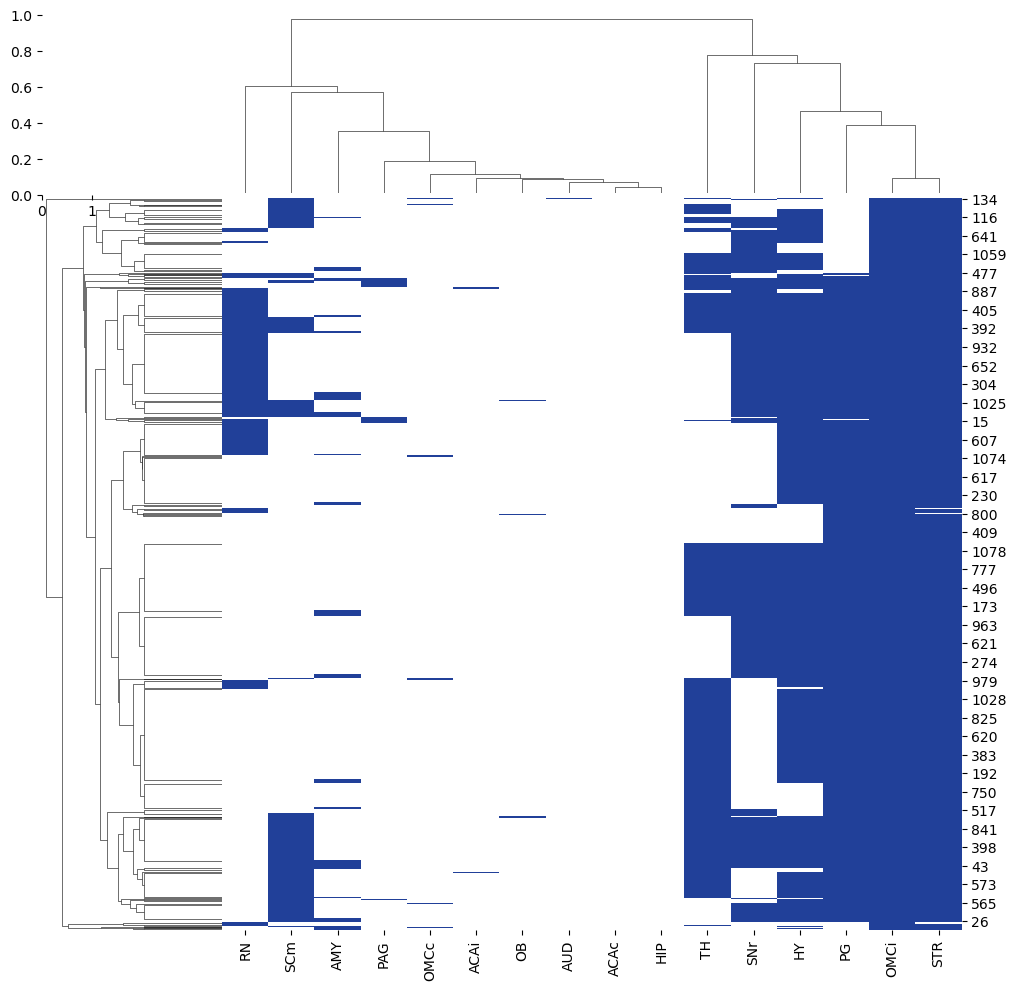

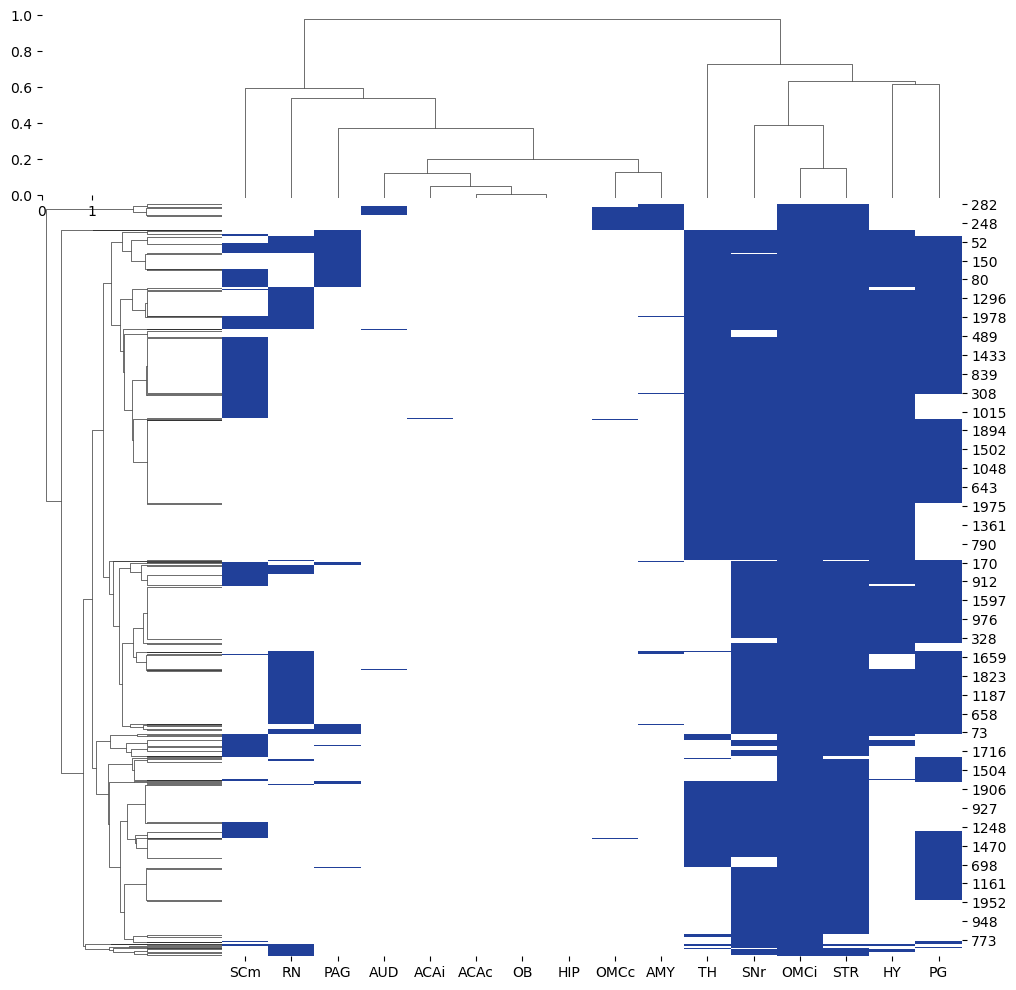

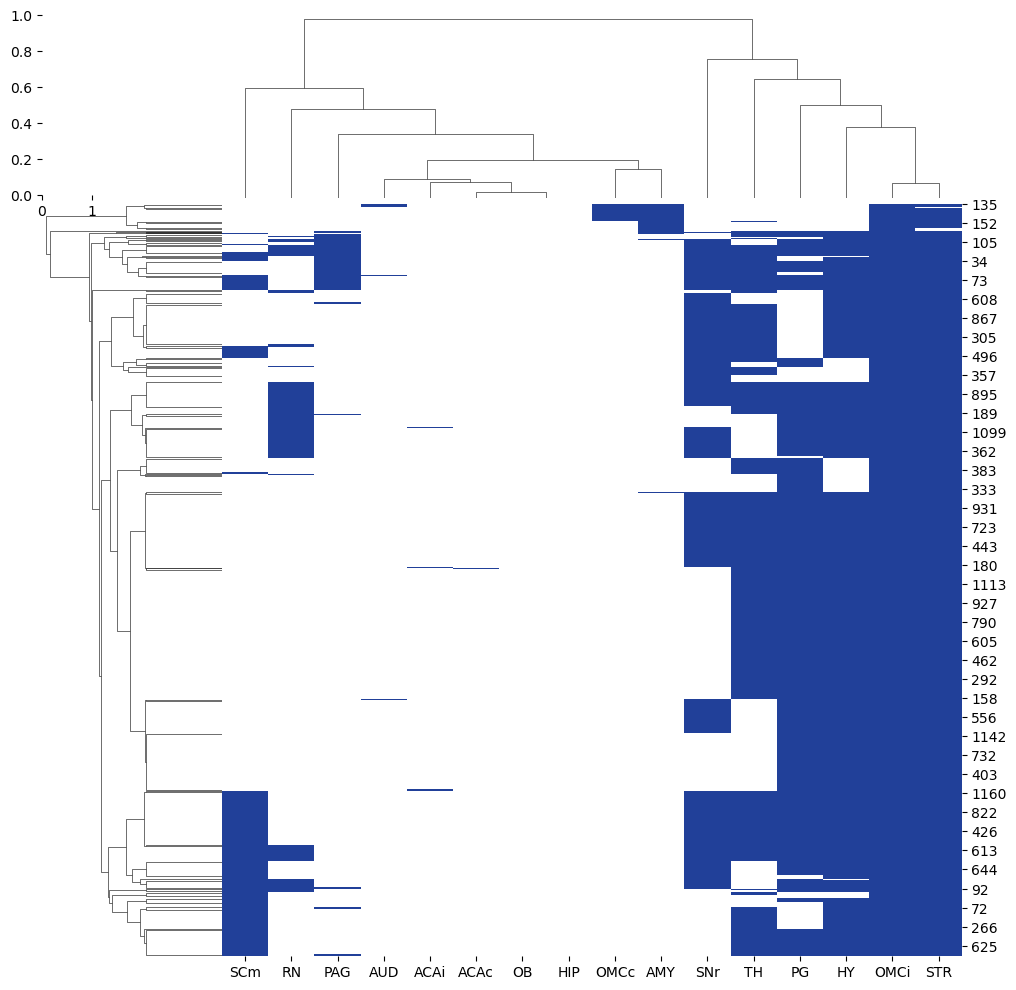

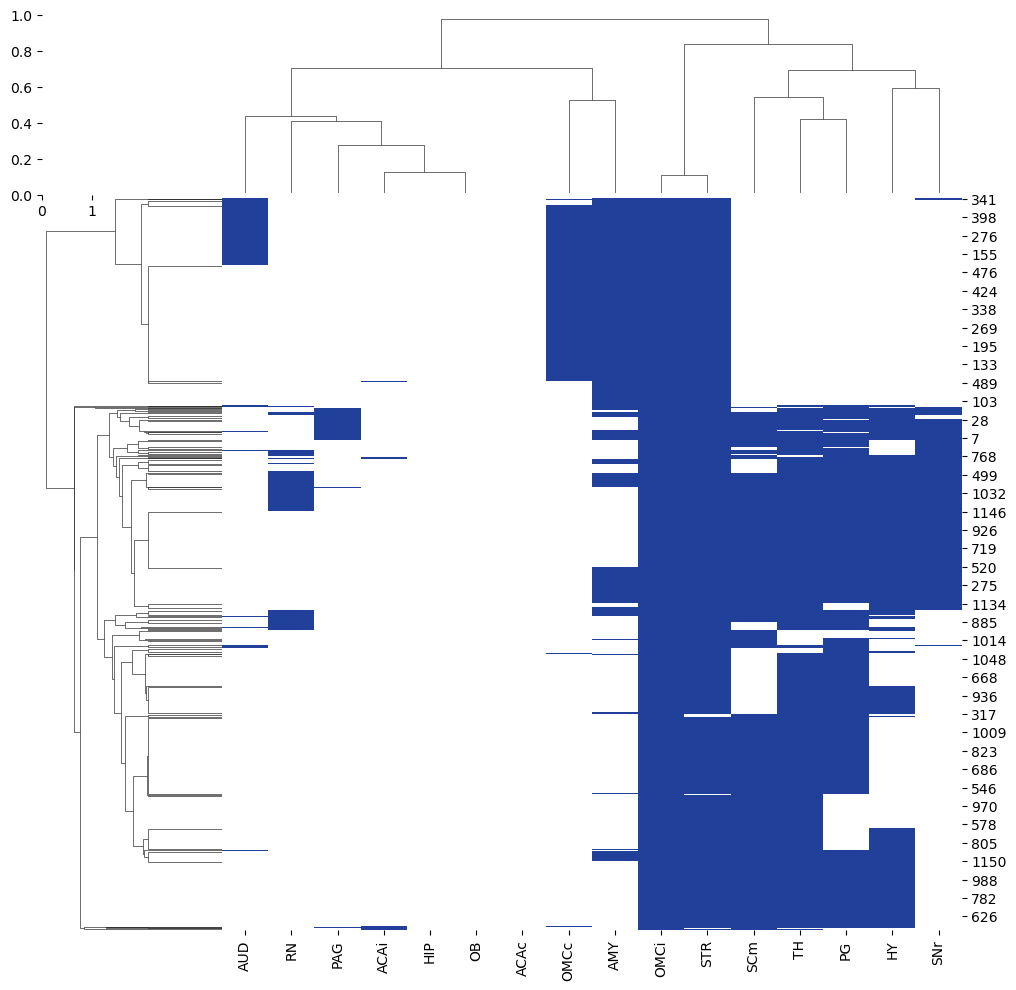

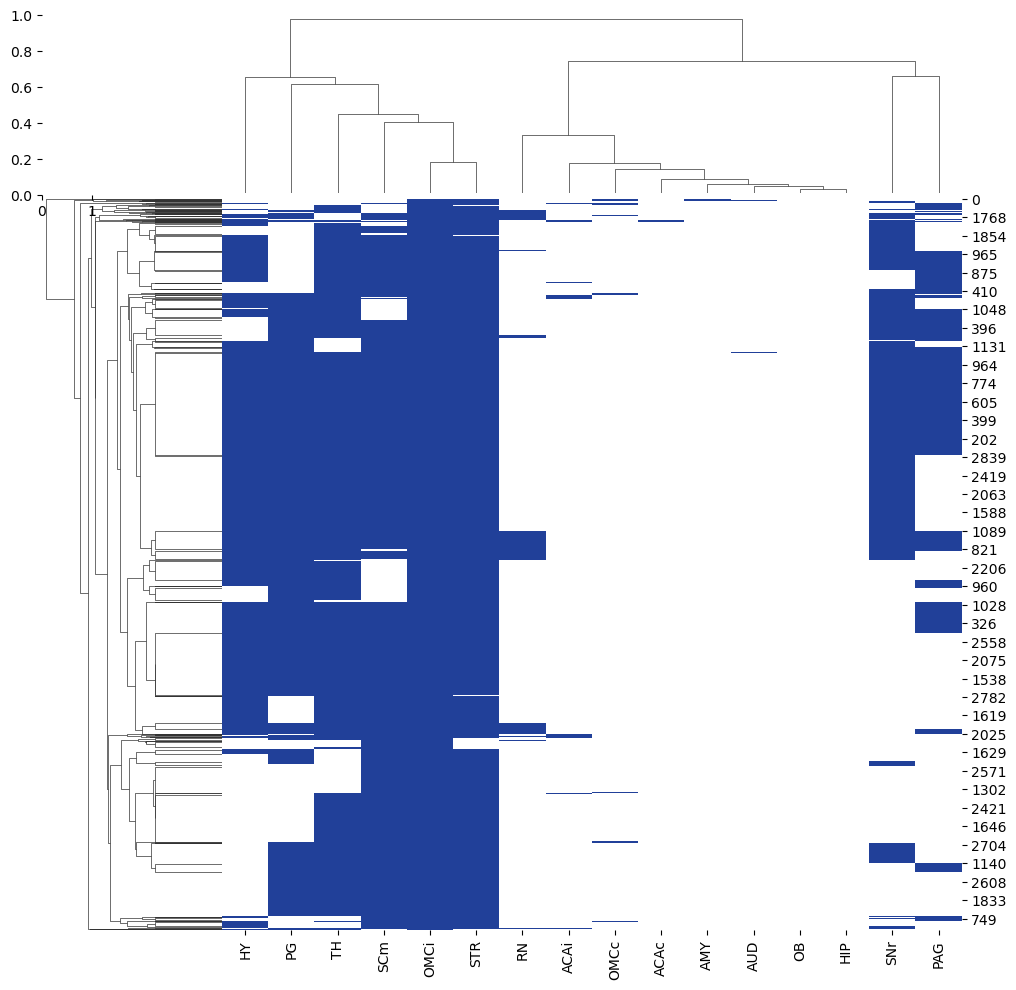

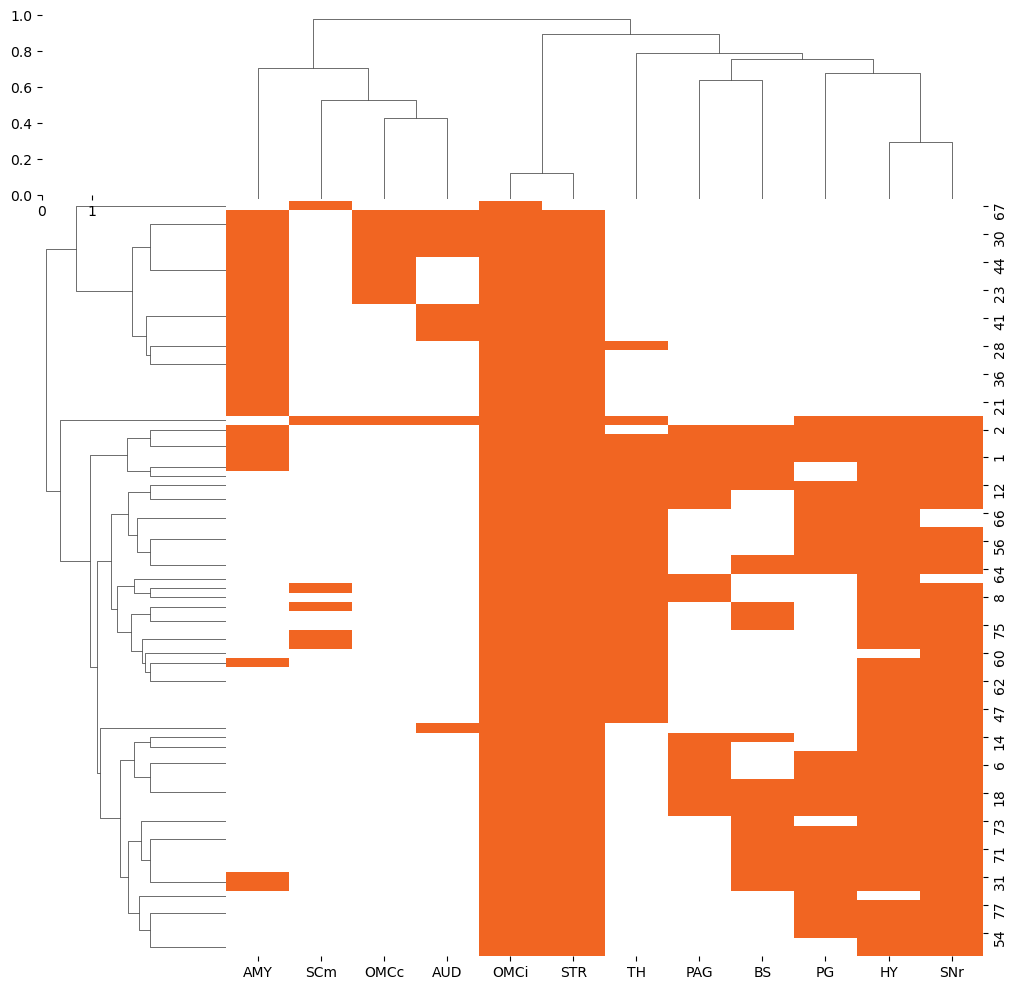

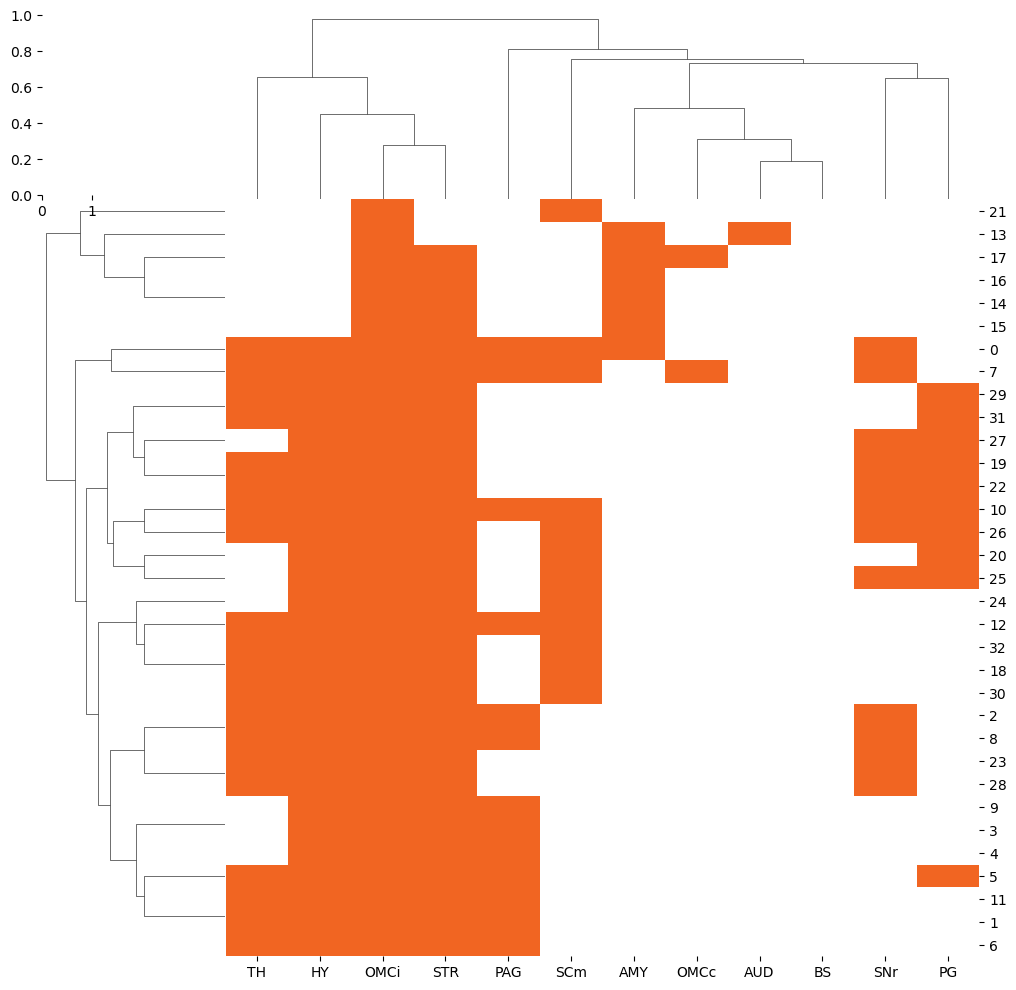

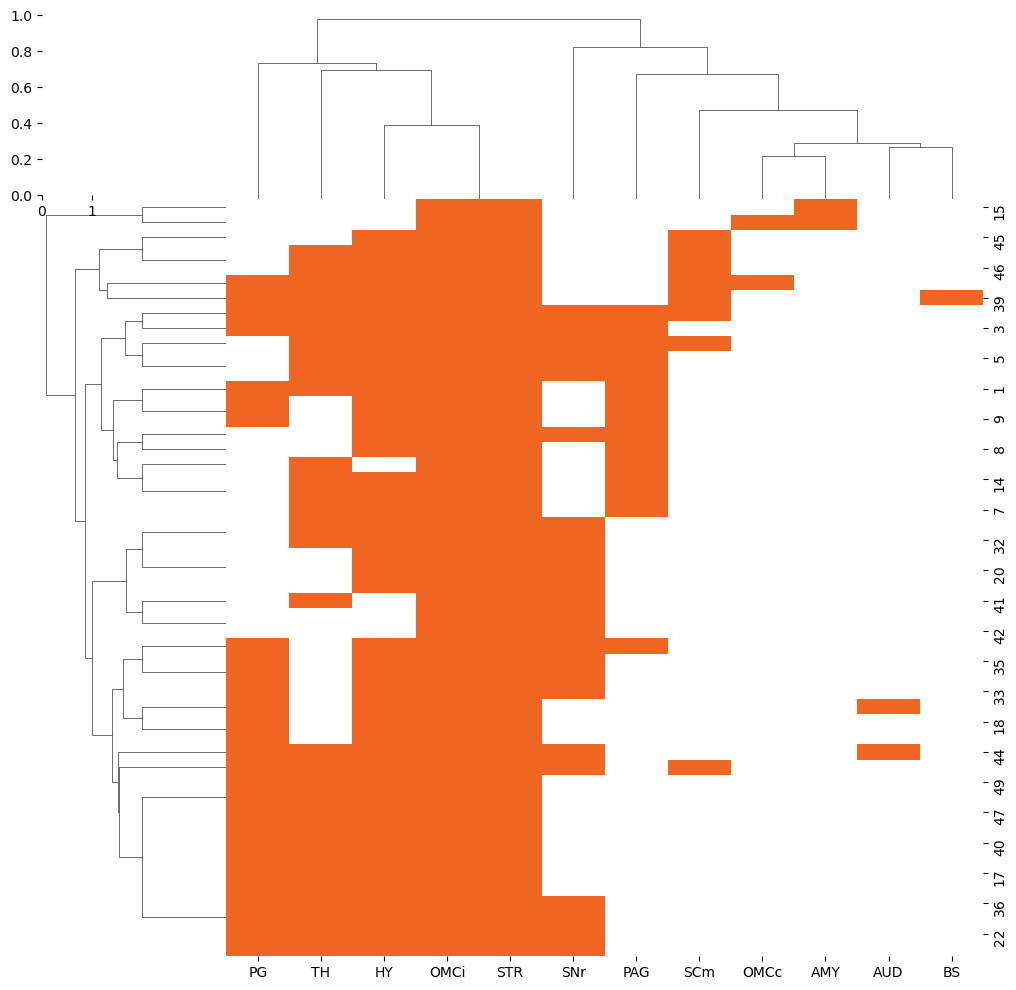

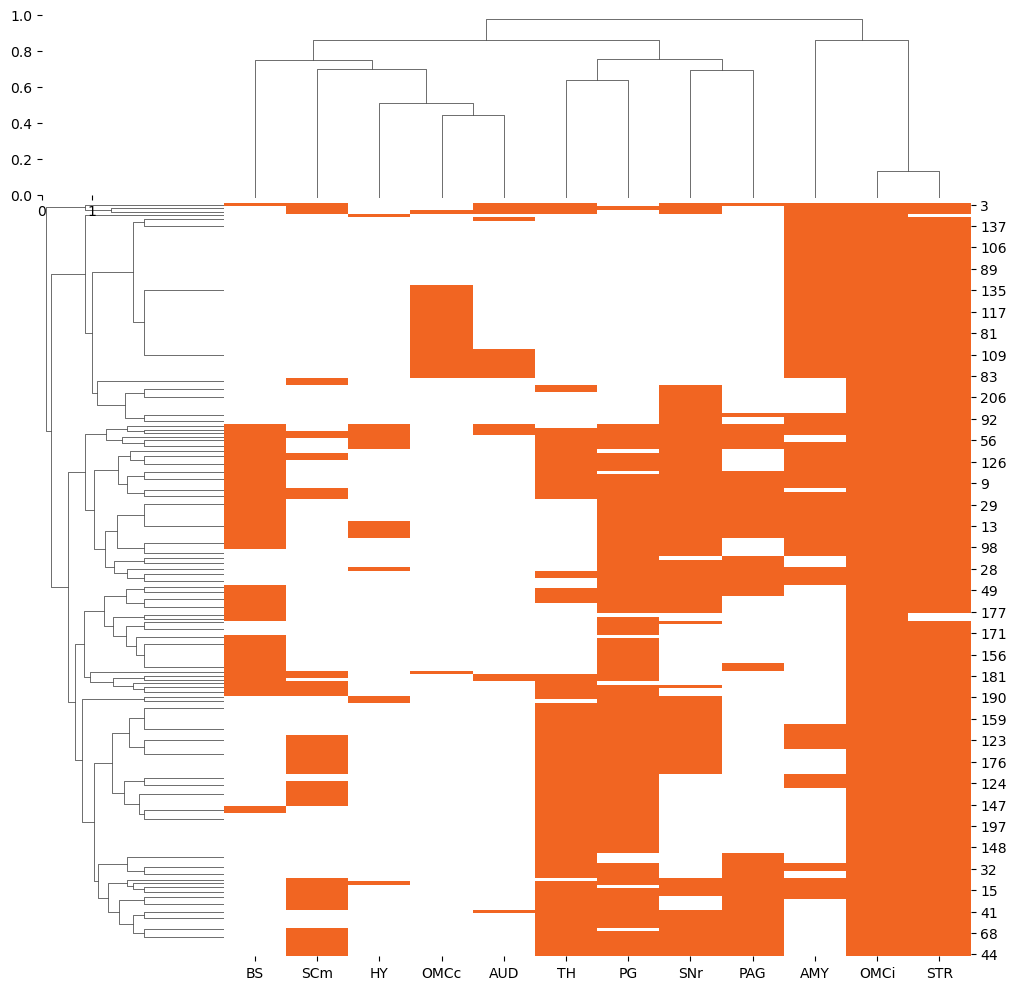

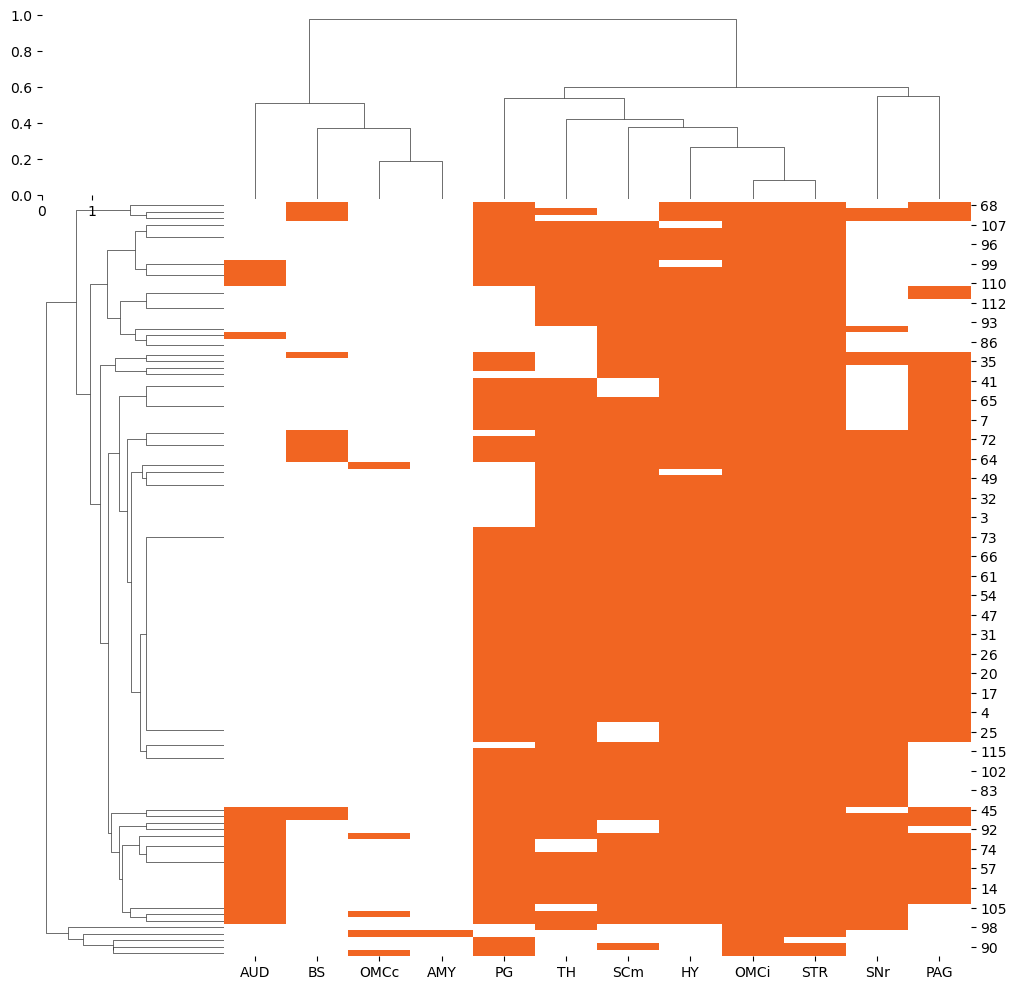

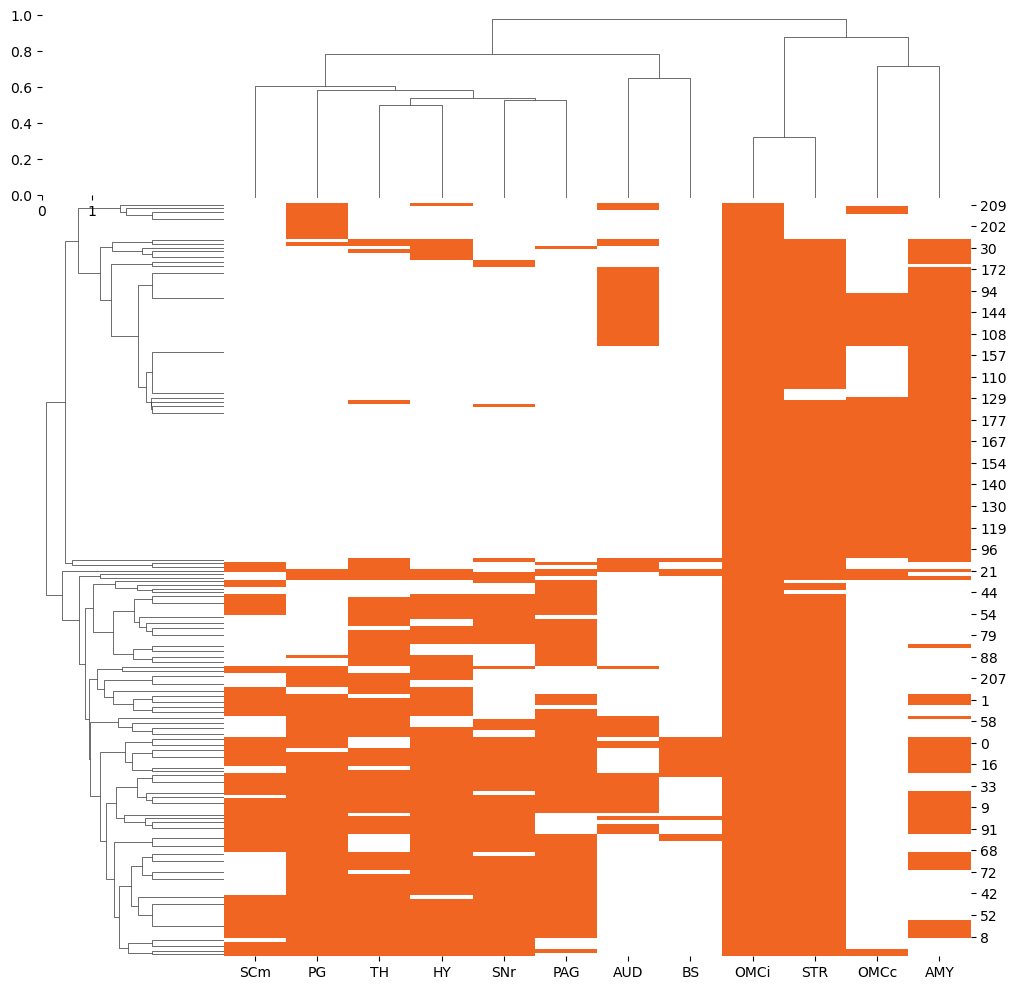

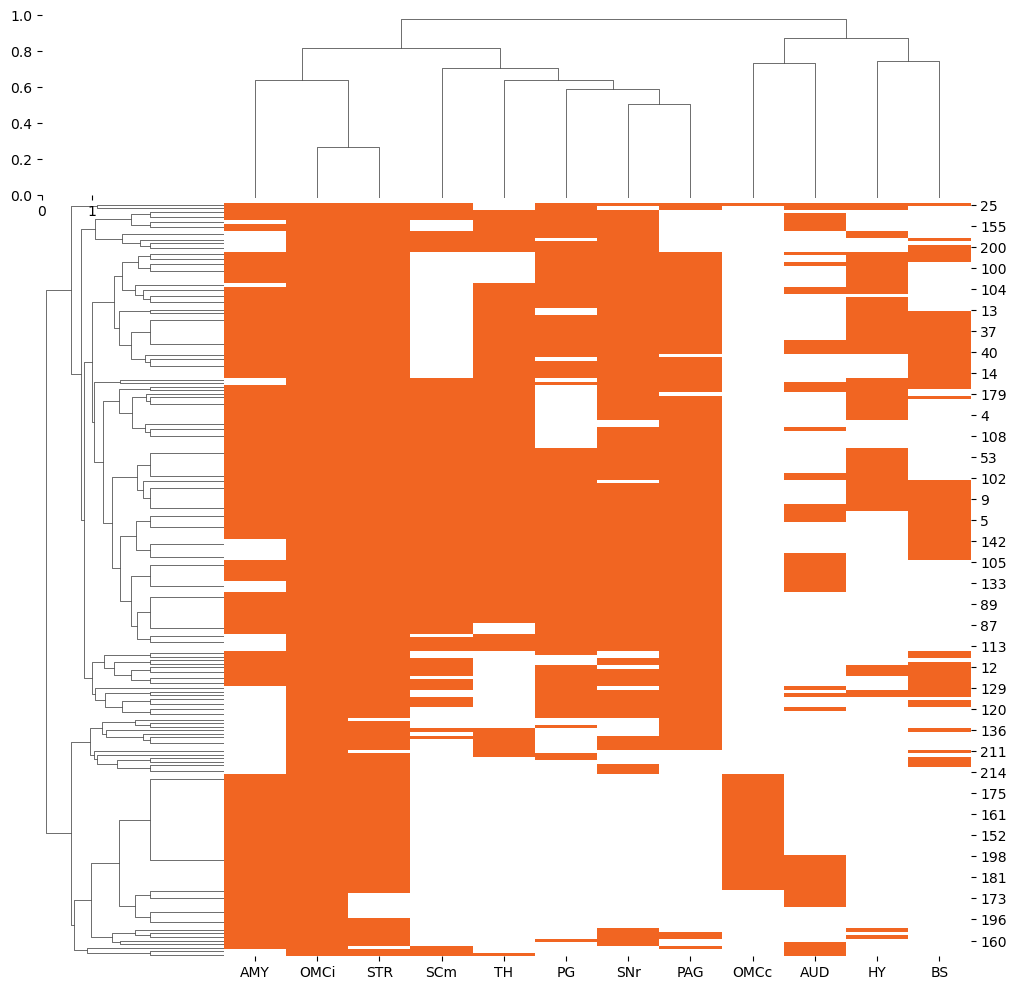

In [18]:
for i in range(5):
    sns.clustermap(omc_pt_mm[i], cmap=blue_cmp, cbar=False)
    plt.savefig(out_path+mice_mm[i]+"_pt_clustermap.jpeg", dpi=300, bbox_inches="tight")

for i in range(7):
    sns.clustermap(omc_pt_st[i], cmap=orange_cmp, cbar=False)
    plt.savefig(out_path+mice_st[i]+"_pt_clustermap.jpeg", dpi=300, bbox_inches="tight")

In [20]:
# just take auditory neurons
aud_it_mm = []
for i in range(len(omc_it_mm)):
    aud_idx = omc_it_mm[i]["AUD"] == 1
    aud_it_mm.append(omc_it_mm[i][aud_idx])

aud_it_st = []
for i in range(len(omc_it_st)):
    aud_idx = omc_it_st[i]["AUD"] == 1
    aud_it_st.append(omc_it_st[i][aud_idx])



Text(0.5, 0.98, 'OMC AUD neurons')

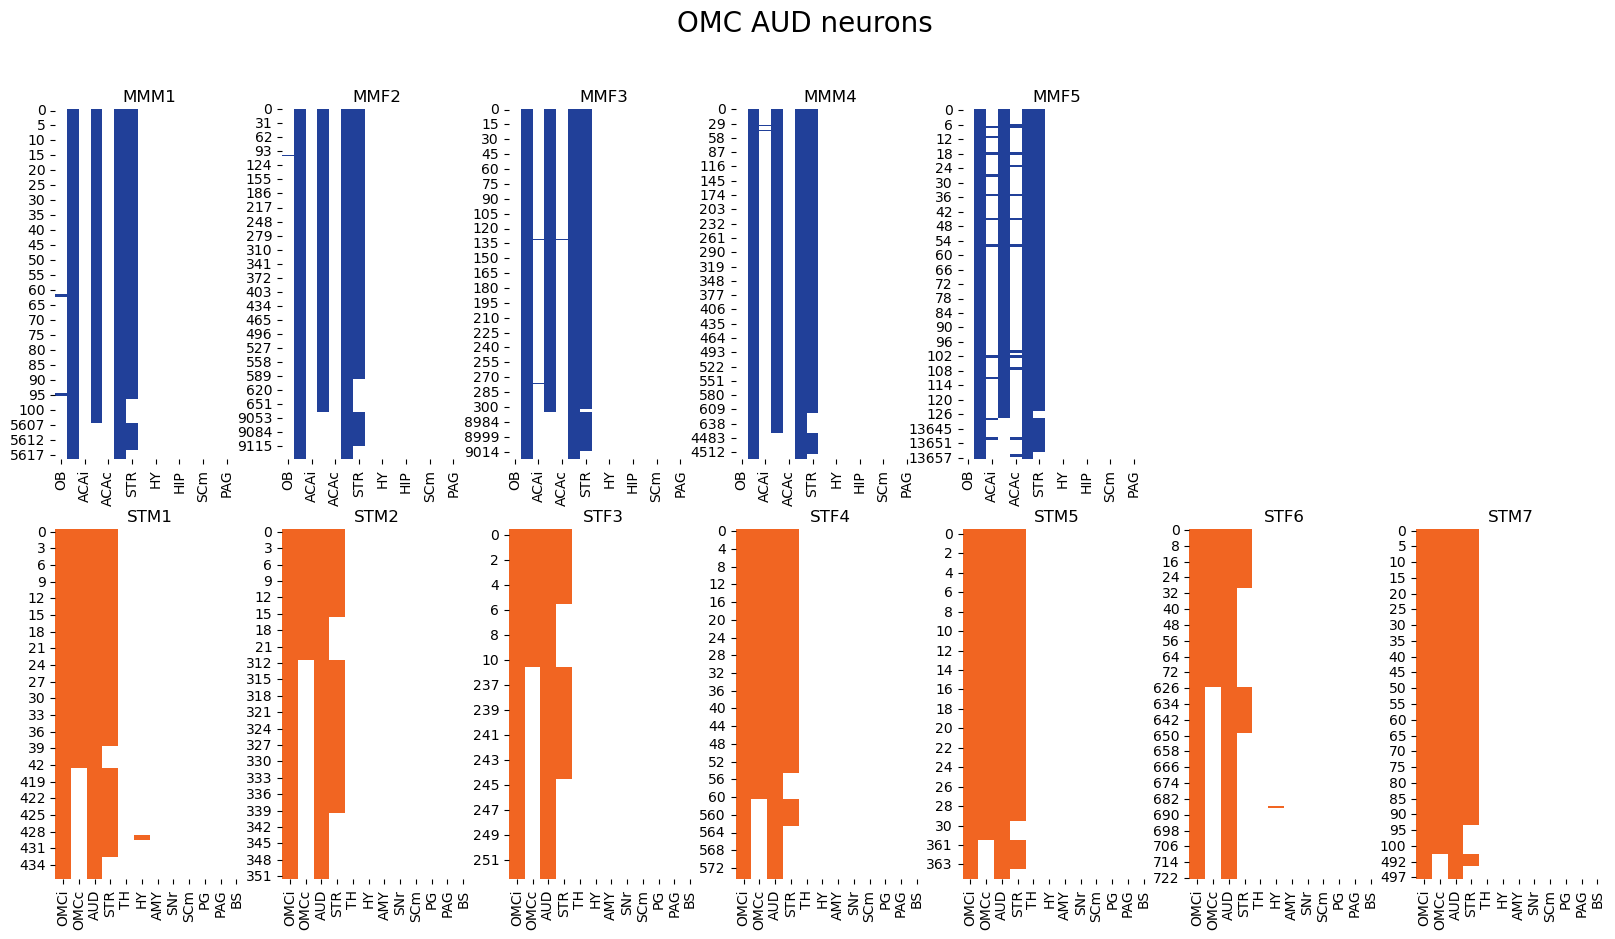

In [21]:
fig, axs = plt.subplots(2,7, figsize=(20,10))

i=0
for ax in axs.flat[:7]:
    if i >= 5:
        ax.axis('off')
    else:
        plot = aud_it_mm[i]
        # sort by cell type
        # plot = plot.sort_values(by=['type']).reset_index(drop=True)
        
        sns.heatmap(plot, cmap=blue_cmp, cbar=False, ax=ax)
        # ax.get_yaxis().set_visible(False)
        ax.set_title(mice_mm[i])
    
    i+=1
    
i=0
for ax in axs.flat[7:]:

    plot = aud_it_st[i]
    # sort by cell type
    # plot = plot.sort_values(by=['type']).reset_index(drop=True)
    
    sns.heatmap(plot, cmap=orange_cmp, cbar=False, ax=ax)
    # ax.get_yaxis().set_visible(False)
    ax.set_title(mice_st[i])

    i+=1

plt.suptitle("OMC AUD neurons", size=20)

# node degrees -> look at changes among degrees + proportions of targets?

In [22]:
node_degrees_mm = []
for i in range(len(omc_it_mm)):
    row_sums = omc_it_mm[i].sum(axis=1) -1 # have to subtract one for injection site (OMCi)
    node_degrees_mm.append(row_sums)

node_degrees_st = []
for i in range(len(omc_it_st)):
    row_sums = omc_it_st[i].sum(axis=1) -1 # have to subtract one for injection site (OMCi)
    node_degrees_st.append(row_sums)


Text(0.5, 0.98, 'OMC MM')

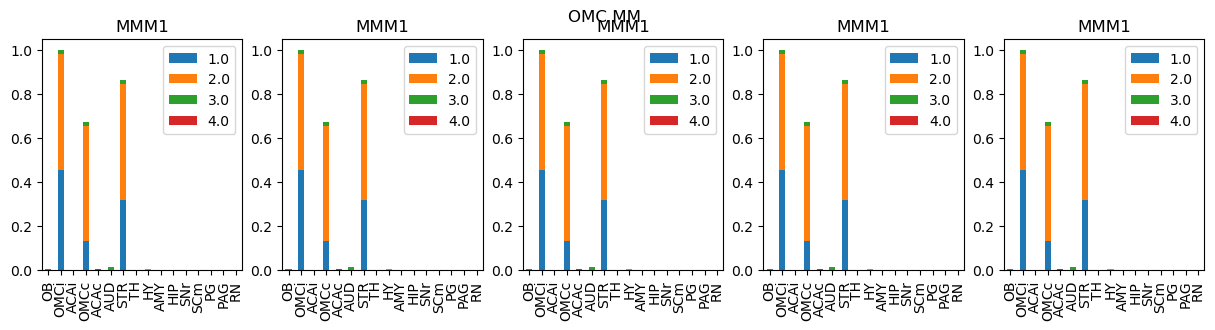

In [23]:
fig, axs = plt.subplots(1,5, figsize=(15,3))

i = 0
for ax in axs.flat:
    bin_x_nodes = omc_it_mm[i].mul(node_degrees_mm[i], axis=0)
    stack_nodes_area = bin_x_nodes.apply(pd.value_counts).drop([0]) # drop node count 0 row
    nodes_area_prop = stack_nodes_area/(stack_nodes_area['OMCi'].sum())
    plotDF = pd.DataFrame(nodes_area_prop.transpose())
    plotDF.plot(kind='bar', stacked=True, edgecolor='none', ax=ax)
    ax.set_title(mice_mm[i])
plt.suptitle("OMC MM")

Text(0.5, 0.98, 'OMC st')

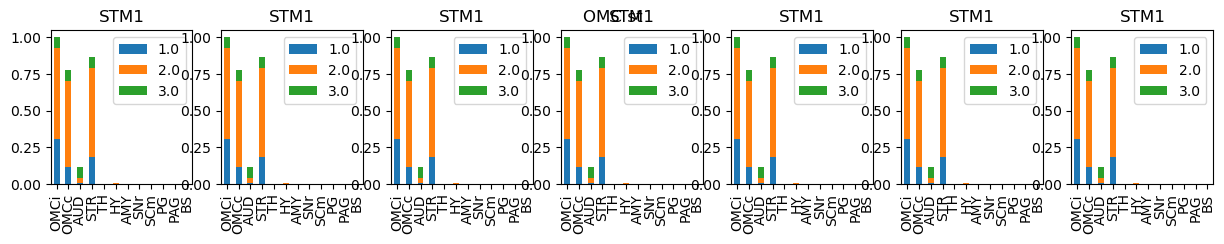

In [24]:
fig, axs = plt.subplots(1,7, figsize=(15,2))

i = 0
for ax in axs.flat:
    bin_x_nodes = omc_it_st[i].mul(node_degrees_st[i], axis=0)
    stack_nodes_area = bin_x_nodes.apply(pd.value_counts).drop([0]) # drop node count 0 row
    nodes_area_prop = stack_nodes_area/(stack_nodes_area['OMCi'].sum())
    plotDF = pd.DataFrame(nodes_area_prop.transpose())
    plotDF.plot(kind='bar', stacked=True, edgecolor='none', ax=ax)
    ax.set_title(mice_st[i])
plt.suptitle("OMC st")

In [25]:
print(omc_it_st[6].shape)
print(aud_it_st[6].shape)
aud_idx.shape

(529, 12)
(111, 12)


(529,)

In [26]:
omc_it_mm[i].shape[0]/aud_it_mm[i].shape[0]

71.26495726495726

In [27]:
# just take auditory neurons
aud_it_mm = []
aud_it_mm_nd = [] # node degrees just for auditory neurons
aud_it_mm_prop = []
for i in range(len(omc_it_mm)):
    aud_idx = omc_it_mm[i]["AUD"] == 1
    aud_it_mm.append(omc_it_mm[i][aud_idx])
    aud_it_mm_nd.append(node_degrees_mm[i][aud_idx])
    aud_it_mm_prop.append(aud_it_mm[i].shape[0]/omc_it_mm[i].shape[0]) # keep track of aud proporiton

aud_it_st = []
aud_it_st_nd = []
aud_it_st_prop = []
for i in range(len(omc_it_st)):
    aud_idx = omc_it_st[i]["AUD"] == 1
    aud_it_st.append(omc_it_st[i][aud_idx])
    aud_it_st_nd.append(node_degrees_st[i][aud_idx])
    aud_it_st_prop.append(aud_it_st[i].shape[0]/omc_it_st[i].shape[0])

Text(0.5, 0.98, 'AUD MM')

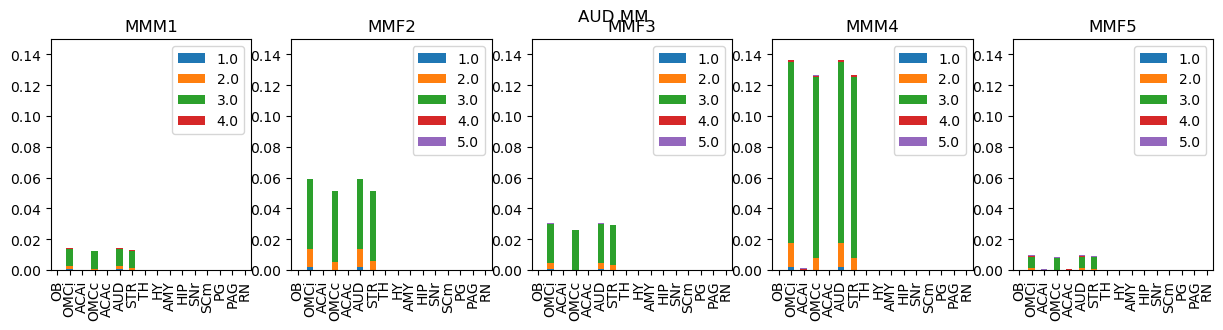

In [28]:
fig, axs = plt.subplots(1,5, figsize=(15,3))

i = 0
for ax in axs.flat:
    bin_x_nodes = aud_it_mm[i].mul(aud_it_mm_nd[i], axis=0)
    stack_nodes_area = bin_x_nodes.apply(pd.value_counts).drop([0]) # drop node count 0 row
    nodes_area_prop = stack_nodes_area/(stack_nodes_area['OMCi'].sum())*(aud_it_mm_prop[i])
    plotDF = pd.DataFrame(nodes_area_prop.transpose())
    plotDF.plot(kind='bar', stacked=True, edgecolor='none', ax=ax)
    ax.set_title(mice_mm[i])
    ax.set_ylim(0,0.15)
    i+=1
plt.suptitle("AUD MM")

Float64Index([1.0, 2.0, 3.0], dtype='float64')
Float64Index([1.0, 2.0, 3.0], dtype='float64')
Float64Index([1.0, 2.0, 3.0], dtype='float64')
Float64Index([1.0, 2.0, 3.0], dtype='float64')
Float64Index([1.0, 2.0, 3.0], dtype='float64')
Float64Index([1.0, 2.0, 3.0], dtype='float64')
Float64Index([1.0, 2.0, 3.0], dtype='float64')


Text(0.5, 0.98, 'AUD st')

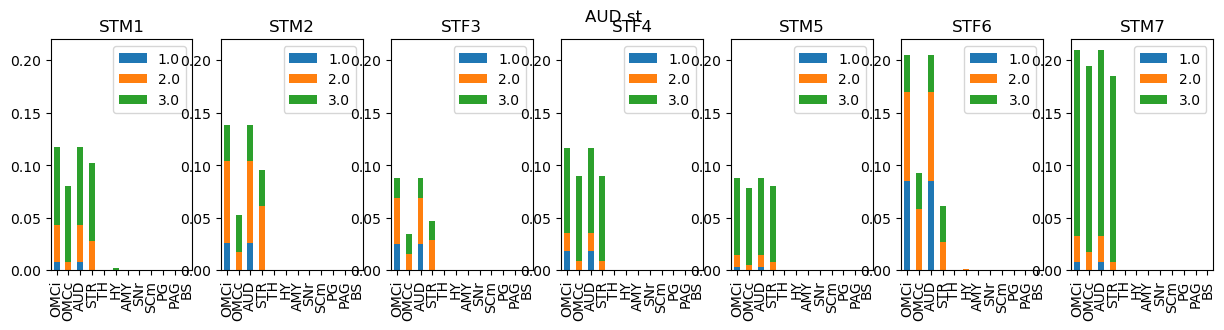

In [29]:
fig, axs = plt.subplots(1,7, figsize=(15,3))

i = 0
for ax in axs.flat:
    bin_x_nodes = aud_it_st[i].mul(aud_it_st_nd[i], axis=0)
    stack_nodes_area = bin_x_nodes.apply(pd.value_counts).drop([0]) # drop node count 0 row
    nodes_area_prop = stack_nodes_area/(stack_nodes_area['OMCi'].sum())*(aud_it_st_prop[i])
    plotDF = pd.DataFrame(nodes_area_prop.transpose())
    print(plotDF.columns)
    plotDF.plot(kind='bar', stacked=True, edgecolor='none', ax=ax)
    ax.set_title(mice_st[i])
    ax.set_ylim(0,0.22)
    i+=1
plt.suptitle("AUD st")

In [45]:
aud_it_mm_all = pd.concat(aud_it_mm)
mm_prop = aud_it_mm_all.sum()/aud_it_mm_all.shape[0]

aud_it_st_all = pd.concat(aud_it_st)
st_prop = aud_it_st_all.sum()/aud_it_st_all.shape[0]

prop_all = pd.concat([mm_prop,st_prop])
prop_all.index.values
prop_all.values
n_areas = prop_all.shape[0]

array([0.00142993, 1.        , 0.01000953, 0.88941849, 0.00714967,
       1.        , 0.914204  , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.6344086 , 1.        , 0.64336918,
       0.        , 0.00358423, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])